In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
# Load dataset
file_path = "Complete_Guns_Dataset_Full.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
features = ['Barrel Length (mm)', 'Caliber', 'Weight (kg)', 'Magazine Capacity', 'Action Type', 'Price (INR)']
target = 'Effective Range (m)'

df = df[features + [target]]

# Handling categorical variables
label_encoders = {}
for col in ['Caliber', 'Action Type', 'Magazine Capacity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Testing the model with one input
sample_input = np.array([[450, 2, 4.2, 30, 1, 250000]])  # Example values
sample_input = scaler.transform(sample_input.reshape(1, -1))  # Scale numerical features
sample_prediction = model.predict(sample_input)
print(f"Predicted Effective Range: {sample_prediction[0]} meters")

# Accuracy Calculation
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"Training Accuracy: {train_score * 100:.2f}%")
print(f"Testing Accuracy: {test_score * 100:.2f}%")

Model Performance:
MAE: 121.21428571428571
RMSE: 225.74268582632226
R² Score: 0.7712211058964316
Predicted Effective Range: 388.0 meters
Training Accuracy: 98.70%
Testing Accuracy: 77.12%


C:\Users\Survesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
model_package = {
    'model':model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'features': features,
    'target': target
}

with open("gun_range_prediction_model.pkl", "wb") as file:
    pickle.dump(model_package, file)

print("Model has been successfully pickled!")

Model has been successfully pickled!


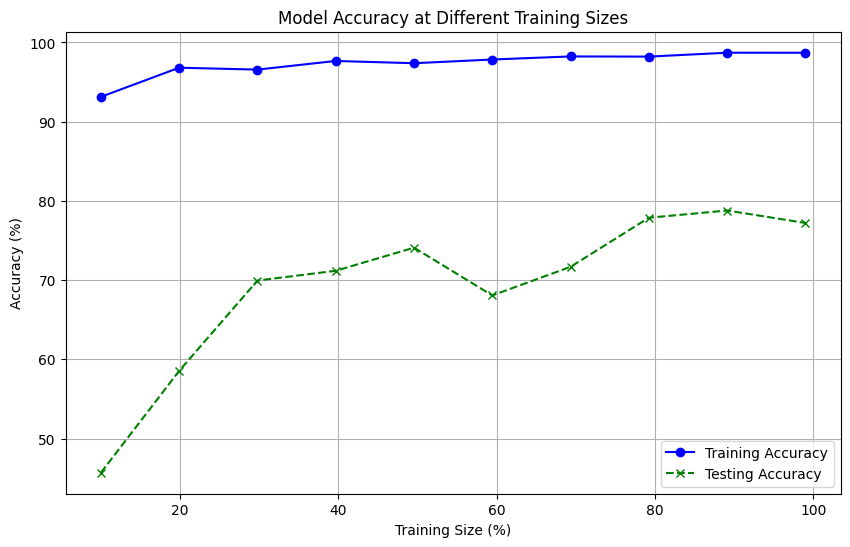

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "Complete_Guns_Dataset_Full.csv"
df = pd.read_csv(file_path)

# Selecting relevant features
features = ['Barrel Length (mm)', 'Caliber', 'Weight (kg)', 'Magazine Capacity', 'Action Type', 'Price (INR)']
target = 'Effective Range (m)'
df = df[features + [target]]

# Handling categorical variables
label_encoders = {}
for col in ['Caliber', 'Action Type', 'Magazine Capacity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building and evaluating model at different training sizes
train_sizes = np.linspace(0.1, 0.99, 10)
train_accuracies = []
test_accuracies = []

for size in train_sizes:
    X_partial, _, y_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_partial, y_partial)
    train_accuracies.append(model.score(X_partial, y_partial) * 100)
    test_accuracies.append(model.score(X_test, y_test) * 100)

# Plotting accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(train_sizes * 100, test_accuracies, label='Testing Accuracy', marker='x', linestyle='--', color='green')
plt.title('Model Accuracy at Different Training Sizes')
plt.xlabel('Training Size (%)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()
